[0.00000000e+00 5.00000000e-05 1.02821018e-04 ... 3.62142243e+00
 3.62090913e+00 3.62039609e+00]


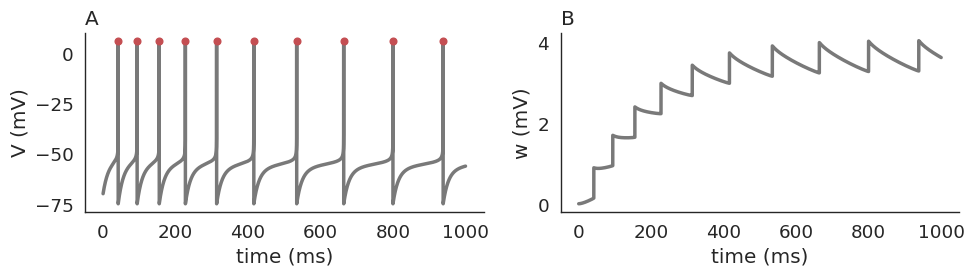

In [2]:
###############################################
## Import packages and specify some settings ##
###############################################
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# This makes plots show up and look nice
%matplotlib inline
sns.set(context='paper',style='white',font_scale=1.5,rc={"lines.linewidth":2.5})
sns.set_palette('muted')

###############################################
###############################################

# Discretized time
T=1000
dt=.1
time=np.arange(0,T,dt)

# Applied current
Ix=np.zeros_like(time)+19

# Neuron parameters
EL=-72
taum=15
Vth=5
Vre=-75
VT=-55
D=2

# Initial condition
V0=-70

b=.75
a=.1
tauw=400

# Compute V using the forward Euler method
V=np.zeros_like(time)
w=np.zeros_like(time)
SpikeTimes=np.array([])
V[0]=V0
w[0]=0
for i in range(len(time)-1):

    # Euler step
    V[i+1]=V[i]+dt*(-(V[i]-EL)+D*np.exp((V[i]-VT)/D)+Ix[i]-w[i])/taum
    w[i+1]=w[i]+dt*(-w[i]+a*(V[i]-EL))/tauw

    # Threshold-reset condition
    if V[i+1]>=Vth:
        V[i+1]=Vre
        w[i+1]=w[i+1]+b
        V[i]=Vth  # This makes plots nicer
        SpikeTimes=np.append(SpikeTimes,time[i+1])



# Make figure
plt.subplots(1,2,figsize=(10, 3))

plt.subplot(1,2,1)
plt.plot(time,V,color=sns.color_palette()[7])
plt.plot(SpikeTimes,Vth+1+0*SpikeTimes,'ro')
plt.xlabel('time (ms)')
plt.ylabel('V (mV)')
sns.despine()
plt.title('A',loc='left')

plt.subplot(1,2,2)
plt.plot(time,w,color=sns.color_palette()[7])
plt.xlabel('time (ms)')
plt.ylabel('w (mV)')
sns.despine()
plt.title('B',loc='left')


plt.tight_layout()


print(w)